In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid", rc={"lines.linewidth": 4})
plt.rcParams.update({'axes.labelsize': 13.5})

In [2]:
def saveFigure(figure, name):
    fig = figure.get_figure()
    fig.savefig(f'../imagenes/evaluacionModelos/{name}.png', dpi=200, bbox_inches='tight')

In [3]:
lg_dfdef = pd.read_csv('../data/resultados/evaluacionModelos/logisticRegresion.csv', sep=';')
lg_dfdef.head()

,Tipo,Algoritmo de Resolución,Accuracy
0,FNORM,NEWTON-CG,0.794597
1,FNORM,LBFGS,0.758996
2,FNORM,LIBLINEAR,0.795830
3,FNORM,SAG,0.792083
4,FNORM,SAGA,0.777059


In [4]:
lg_dfdef[lg_dfdef['Tipo'] == 'RNORM'].sort_values(by=['Accuracy'], ascending=False).head(3)

,Tipo,Algoritmo de Resolución,Accuracy
8,RNORM,SAG,0.791083
5,RNORM,NEWTON-CG,0.783535
7,RNORM,LIBLINEAR,0.775834


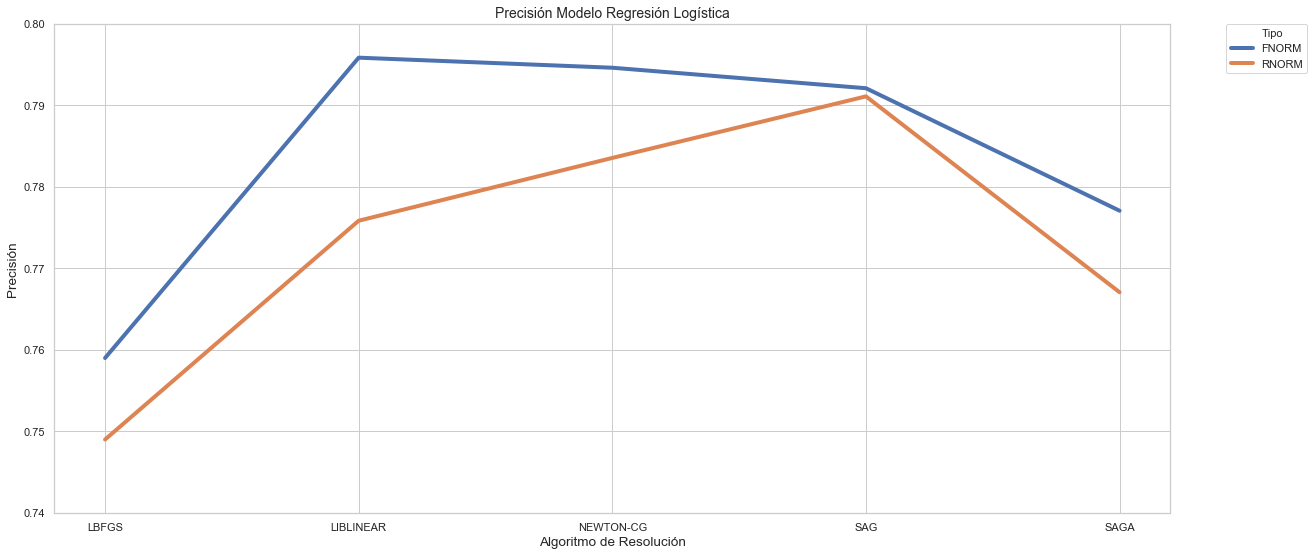

In [5]:
plt.figure(figsize=(20,9))
lr_graph = sns.lineplot(x="Algoritmo de Resolución", y="Accuracy", hue='Tipo', data=lg_dfdef)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0.74, 0.8])

plt.title("Precisión Modelo Regresión Logística", fontsize=14)
plt.xlabel('Algoritmo de Resolución')
plt.ylabel('Precisión')
saveFigure(lr_graph, "logistic_regression-global-def")

In [6]:
lg_df = pd.read_csv('../data/resultados/evaluacionModelos/logisticRegresionTuneo.csv', sep=';')
lg_df.head()

,Penalty,Algoritmo de Resolución,C,Accuracy,Tipo
0,l1,SAGA,0.00001,0.793190,TRAIN
1,l1,SAGA,0.00001,0.793704,TEST
2,l1,SAGA,0.00010,0.793076,TRAIN
3,l1,SAGA,0.00010,0.793697,TEST
4,l1,SAGA,0.00100,0.793052,TRAIN


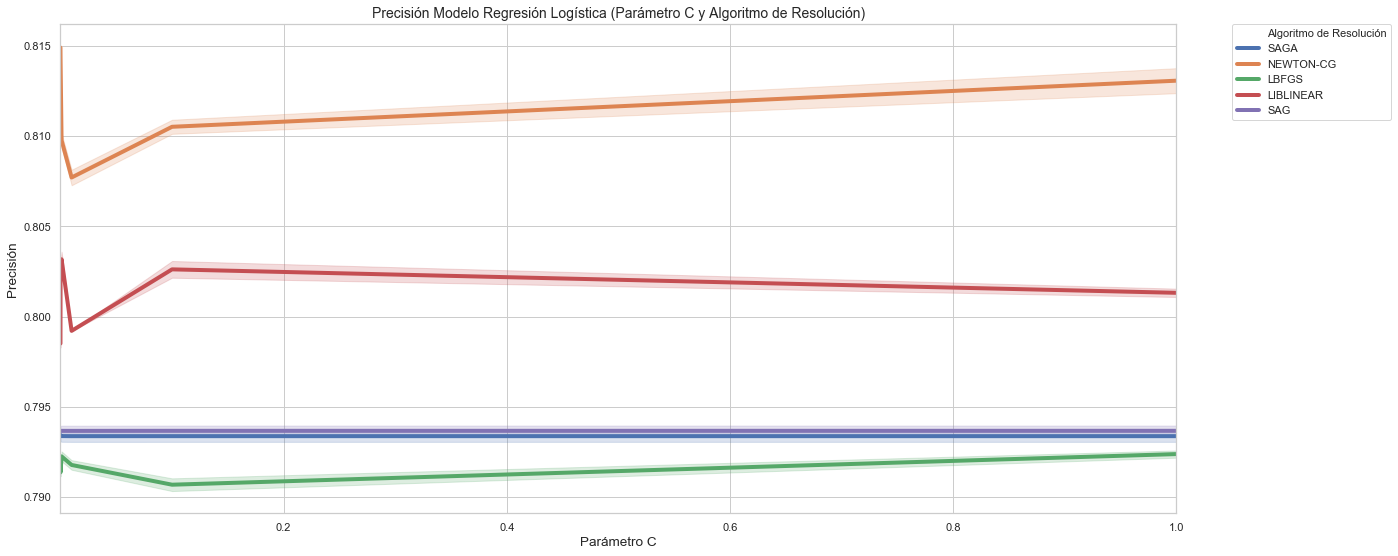

In [7]:
plt.figure(figsize=(20,9))
lr_graph = sns.lineplot(x="C", y="Accuracy", hue='Algoritmo de Resolución', data=lg_df)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlim([0.00000001, 1])
plt.title("Precisión Modelo Regresión Logística (Parámetro C y Algoritmo de Resolución)", fontsize=14)
plt.xlabel('Parámetro C')
plt.ylabel('Precisión')

saveFigure(lr_graph, "logistic_regression-global")